In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Setup the 2006 dataframe

In [2]:
six = pd.read_table("NSDUH_2006_Tab.tsv",sep='\t', header = 0, index_col = 0, low_memory=False)

Create the 2006 Class Variable

In [3]:
six["COMB"] = (
    six["PROCODNP"]
    +six["OXYCODP2"]
    +six["HYDCODOP"]
    +six["TRAMADP"])
six["CLASS"] = 0
six.loc[(six["COMB"]>0) & (six["ANLYR"]==1),"CLASS"]=1
six.loc[(six["HERYR"]==1) | (six["OXYYR"]==1),"CLASS"]=1

Select the fields to study 2006 current co-incident drug use

In [4]:

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","CLASS"]

Select the fields to study 2006 Demographic effects

In [5]:
six_otherdrug = six.loc[six["CATAG3"]==4,drug_use2006]

In [6]:
six_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALYR,INHYR,TRQYR,STMYR,MTHYR,SEDYR,CLASS
QUESTID2,,,,,,,,,,,,
76775602,0,0,0,0,0,0,0,0,0,0,0,1
79748602,0,1,0,0,0,0,0,0,0,0,0,0
66270602,0,1,0,0,0,0,0,0,0,0,0,0
32480602,1,1,0,0,0,0,0,0,0,0,0,0
40722602,1,1,0,0,0,0,0,0,0,0,0,0


2021 - setup data frame, create CLASS variable, select certain fields for certain studies

In [7]:
tw1 = pd.read_table(
    "NSDUH_2021_Tab.txt",
    sep='\t', 
    header = 0, 
    index_col = 0, 
    low_memory=False)

In [8]:
tw1["CLASS"] = tw1["OPIANYYR"]

In [9]:

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","CLASS"]

In [10]:
tw1_otherdrug = tw1.loc[tw1["CATAG3"]==4,drug_use2021]

In [11]:
tw1_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALLUCYR,INHALYR,TRQANYYR,STMANYYR,METHAMYR,SEDANYYR,CLASS
QUESTID2,,,,,,,,,,,,
10002722,1,0,1,0,0,0,0,0,0,0,0,0
10004796,0,1,0,0,0,0,0,0,1,0,0,0
10007045,0,1,0,0,0,0,0,1,0,0,0,1
10008166,0,1,0,0,0,0,0,0,0,0,0,0
10009495,0,1,0,0,0,0,0,0,0,0,1,0


ANALYSIS OF 2006 DATA

In [12]:
six_pop_size = len(six_otherdrug)

In [13]:
six_opium_user = len(six_otherdrug[six_otherdrug["CLASS"]==1])

In [14]:
pct_drug_coinc_2006 = [
    len(six_otherdrug[(six_otherdrug["CLASS"]==1) 
        & (six_otherdrug[x]==1)])/six_opium_user 
    for x in drug_use2006[0:11]]

In [15]:
pct_druguse_overall_2006 = [
    len(six_otherdrug[(six_otherdrug[x]==1)])/six_pop_size 
    for x in drug_use2006]

Analysis of 2021 Data

In [16]:
tw1_pop_size = len(tw1_otherdrug) 

In [17]:
tw1_opium_user = len(tw1_otherdrug[tw1_otherdrug["CLASS"]==1])

In [18]:
pct_drug_coinc_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug["CLASS"]==1) 
        & (tw1_otherdrug[x]==1)])/tw1_opium_user 
    for x in drug_use2021[0:11]]

In [19]:
pct_druguse_overall_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug[x]==1)])/tw1_pop_size 
    for x in drug_use2021]

Visualizing change of usage rates between 2006 to 2021

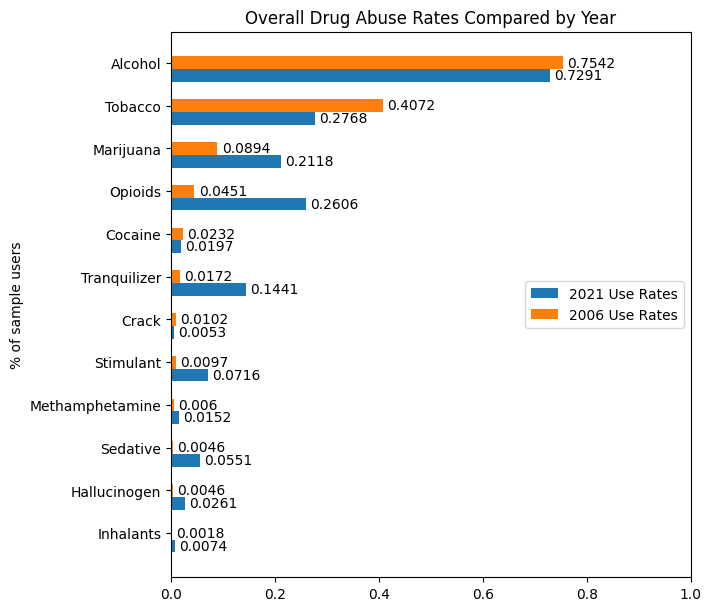

In [20]:
drug_class = ("Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative","Opioids")

drug_class_sorted = list(np.array(drug_class)[np.argsort(pct_druguse_overall_2006)])
use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_druguse_overall_2021)[np.argsort(pct_druguse_overall_2006)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_druguse_overall_2006)[np.argsort(pct_druguse_overall_2006)],4)),
}

x = np.arange(len(drug_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Overall Drug Abuse Rates Compared by Year')
ax.set_yticks(x + width, drug_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

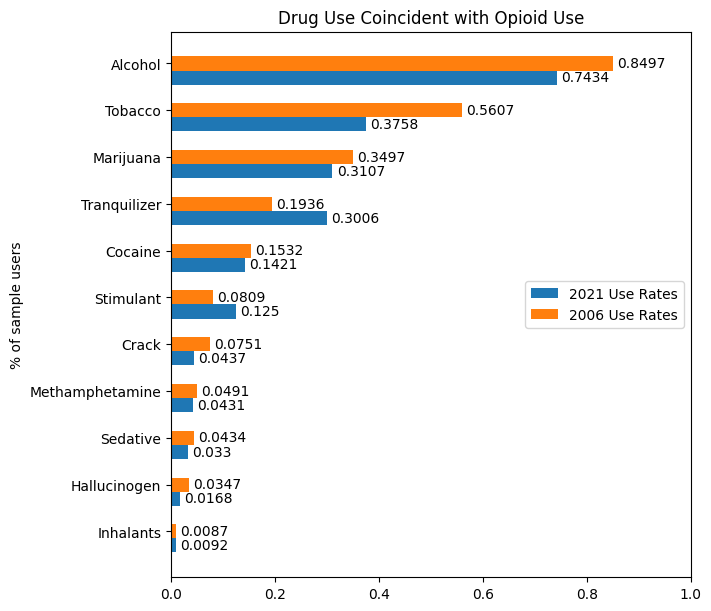

In [21]:


opioid_comp_class = ["Tobacco","Alcohol","Marijuana","Cocaine","Crack","Hallucinogen","Inhalants",
           "Tranquilizer","Stimulant","Methamphetamine","Sedative"]

opioid_comp_class_sorted = list(np.array(opioid_comp_class)[np.argsort(pct_drug_coinc_2006)])

use_rates = {
    '2021 Use Rates': list(np.around(np.array(pct_drug_coinc_2021)[np.argsort(pct_drug_coinc_2021)],4)),
    '2006 Use Rates': list(np.around(np.array(pct_drug_coinc_2006)[np.argsort(pct_drug_coinc_2006)],4)),
}

x = np.arange(len(opioid_comp_class))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in use_rates.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(7,6)
ax.set_ylabel('% of sample users')
ax.set_title('Drug Use Coincident with Opioid Use')
ax.set_yticks(x + width, opioid_comp_class_sorted)
ax.legend(loc='center right')
ax.set_xlim(0, 1)
plt.show()

In [22]:
age_use2006 = ['IRCIGAGE','IRALCAGE','IRMJAGE',
               'IRCOCAGE','IRCRKAGE','IRHALAGE',
               'IRINHAGE','IRTRNAGE','IRSTMAGE',
               'IRMTHAGE','IRSEDAGE','CLASS'
              ]
#Alcohol, Tobacco, Marijuana, Tranquilizer, 
#Cocaine, Stimulant, Crack, Methamphetamine, 
#Sedative, Hallucinogen, Inhalants

In [23]:
age_use2021 = ['IRCIGAGE','IRALCAGE','IRMJAGE',
               'IRCOCAGE','IRCRKAGE','IRHALLUCAGE',
               'IRINHALAGE','IRMETHAMAGE','IRTRQNMAGE',
               'IRSTMNMAGE','IRSEDNMAGE','CLASS'
              ]

In [24]:
six_ageuse = six.loc[six["CATAG3"]==4,age_use2006]
tw1_ageuse = tw1.loc[tw1["CATAG3"]==4,age_use2021]

In [25]:
#for x in age_use2021:
#    tw1_ageuse = tw1_ageuse[tw1_ageuse[x]<100]

#for x in age_use2006:
#    six_ageuse = six_ageuse[six_ageuse[x]<100]

#tw1_ageuse.head()

#for x in age_use2021[0:11]:
#    tw1_ageuse.loc[tw1_ageuse[x]>100,x]=-10

#for x in age_use2006[0:11]:
#    six_ageuse.loc[six_ageuse[x]>100,x]=-10

#six_ageuse.loc[six_ageuse['IRCIGAGE']>100,'IRCIGAGE']=-10
#tw1_ageuse.loc[tw1_ageuse['IRCIGAGE']>100,'IRCIGAGE']=-10

#six_ageuse.loc[six_ageuse['IRALCAGE']>100,'IRALCAGE']=-10
#tw1_ageuse.loc[tw1_ageuse['IRALCAGE']>100,'IRALCAGE']=-10



In [26]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr))*stdev

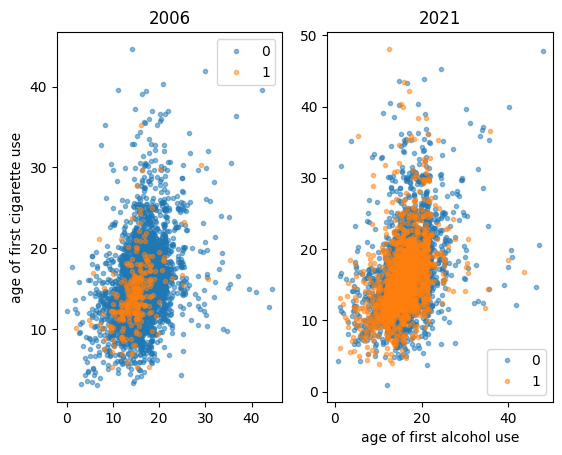

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRCIGAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRCIGAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRCIGAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.5)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRCIGAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.5)
    

ax1.set_ylabel('age of first cigarette use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

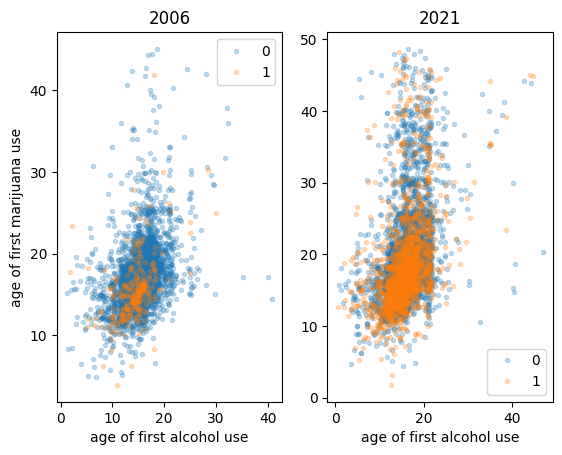

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRMJAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRMJAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRMJAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.25)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRMJAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.25)
    

ax1.set_ylabel('age of first marijuana use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

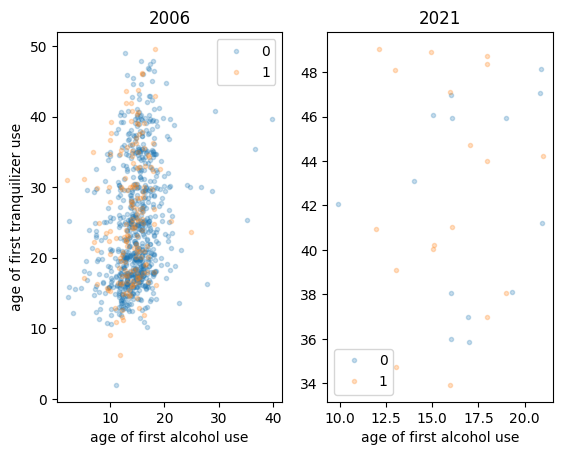

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2)
#fig.subplots_adjust(vspace=.5)

groups6 = six_ageuse[(six_ageuse['IRALCAGE']<100) & (six_ageuse['IRTRNAGE']<100)].groupby('CLASS')
groups21 = tw1_ageuse[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['IRTRQNMAGE']<100)].groupby('CLASS')

for name,group in groups6:
    ax1.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRTRNAGE),
            marker='o',linestyle='',markersize=3,label=name,alpha=.25)
for name,group in groups21:
    ax2.plot(rand_jitter(group.IRALCAGE),rand_jitter(group.IRTRQNMAGE),
             marker='o',linestyle='',markersize=3,label=name,alpha=.25)
    

ax1.set_ylabel('age of first tranquilizer use')
ax2.set_xlabel('age of first alcohol use')
ax1.set_xlabel('age of first alcohol use')
ax1.set_title('2006')
ax2.set_title('2021')
ax1.legend()
ax2.legend()

plt.show()

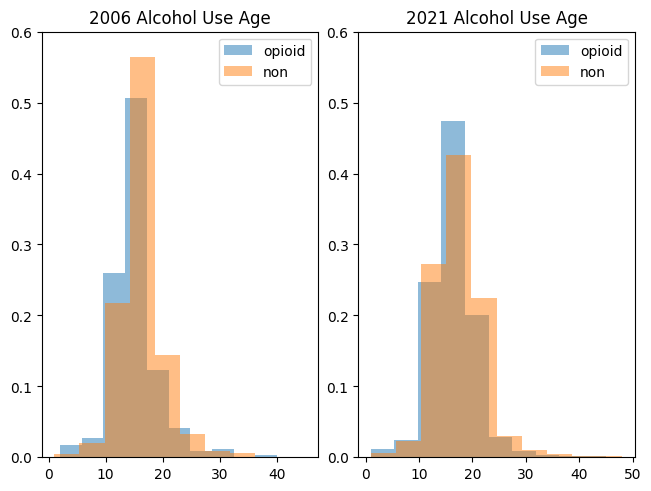

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRALCAGE']<100) & (six_ageuse['CLASS']==1),'IRALCAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRALCAGE']<100) & (six_ageuse['CLASS']==0),'IRALCAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['CLASS']==1),'IRALCAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRALCAGE']<100) & (tw1_ageuse['CLASS']==0),'IRALCAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Alcohol Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Alcohol Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

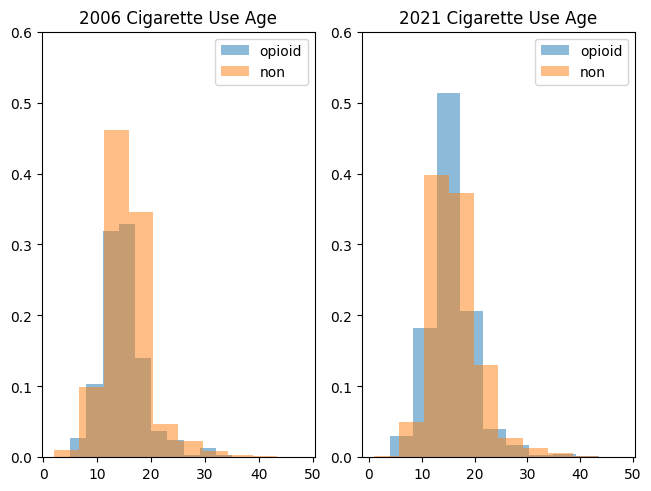

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRCIGAGE']<100) & (six_ageuse['CLASS']==1),'IRCIGAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRCIGAGE']<100) & (six_ageuse['CLASS']==0),'IRCIGAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRCIGAGE']<100) & (tw1_ageuse['CLASS']==1),'IRCIGAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRCIGAGE']<100) & (tw1_ageuse['CLASS']==0),'IRCIGAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Cigarette Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Cigarette Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

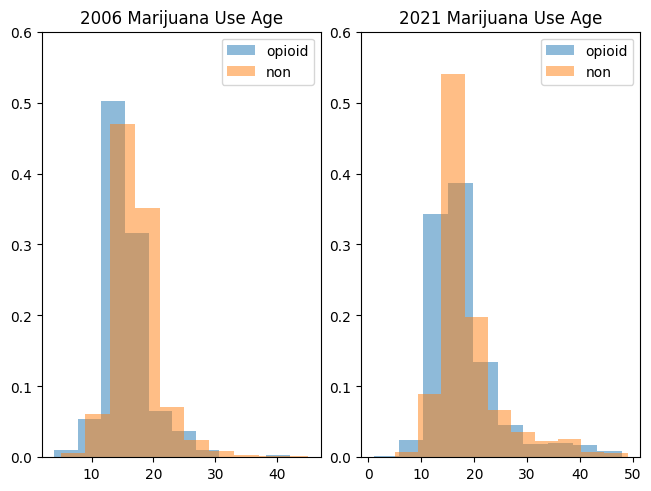

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,layout='constrained')

usersix = six_ageuse.loc[(six_ageuse['IRMJAGE']<100) & (six_ageuse['CLASS']==1),'IRMJAGE']
userweightssix = np.ones_like(usersix)/len(usersix)

nonusersix = six_ageuse.loc[(six_ageuse['IRMJAGE']<100) & (six_ageuse['CLASS']==0),'IRMJAGE']
nonuserweightssix = np.ones_like(nonusersix)/len(nonusersix)

usertw1 = tw1_ageuse.loc[(tw1_ageuse['IRMJAGE']<100) & (tw1_ageuse['CLASS']==1),'IRMJAGE']
userweightstw1 = np.ones_like(usertw1)/len(usertw1)

nonusertw1 = tw1_ageuse.loc[(tw1_ageuse['IRMJAGE']<100) & (tw1_ageuse['CLASS']==0),'IRMJAGE']
nonuserweightstw1 = np.ones_like(nonusertw1)/len(nonusertw1)

ax1.hist(usersix,weights=userweightssix,alpha=.5,histtype='bar',label='opioid')
ax1.hist(nonusersix,weights=nonuserweightssix,alpha=.5,histtype='bar',label='non')
ax2.hist(usertw1,weights=userweightstw1,alpha=.5,histtype='bar',label='opioid')
ax2.hist(nonusertw1,weights=nonuserweightstw1,alpha=.5,histtype='bar',label='non')

tix = (0,.1,.2,.3,.4,.5,.6)

ax1.set_title('2006 Marijuana Use Age')
ax1.set_yticks(tix)
ax1.legend()

ax2.set_title('2021 Marijuana Use Age')
ax2.set_yticks(tix)
ax2.legend()

plt.show()

to do:
construct a list of demographic variables, create some visuals: Gender, Education Level, Income Level, Health Insurance Coverage; Welfare; Poverty

In [33]:
demo2006 = ['IRSEX','GOVTPROG','INCOME','POVERTY2','SEXRACE','EDUCCAT2',
            'EMPSTATY','HEALTH2','IRMARIT','AJAMDELT','AJAMDEYR',
           'SPDYRADJ','AMHINP2','CLASS']

demo2021 = ['IRSEX','GOVTPROG','INCOME','POVERTY3','SEXRACE','EDUHIGHCAT',
            'IRWRKSTAT','HEALTH2','IRMARIT','CASUPROB2','IRAMDELT',
            'IRAMDEYR','SPDPSTYR','AMHINP2','CLASS']

In [34]:
six_demo = six.loc[six["CATAG3"]==4,demo2006]
tw1_demo = tw1.loc[tw1["CATAG3"]==4,demo2021]

In [35]:
print(six_demo.head())

          IRSEX  GOVTPROG  INCOME  POVERTY2  SEXRACE  EDUCCAT2  EMPSTATY   
QUESTID2                                                                   
76775602      2         2       1       1.0        4         3         2  \
79748602      1         2       2       3.0        1         2         1   
66270602      1         2       2       3.0        1         3         1   
32480602      1         2       3       3.0        1         4         1   
40722602      1         2       2       2.0        1         1         1   

          HEALTH2  IRMARIT  AJAMDELT  AJAMDEYR  SPDYRADJ  AMHINP2  CLASS  
QUESTID2                                                                  
76775602      3.0        1       2.0       2.0       1.0      2.0      1  
79748602      2.0        1       2.0       2.0       0.0      2.0      0  
66270602      2.0        3       2.0       2.0       0.0      2.0      0  
32480602      3.0        1       2.0       2.0       0.0      2.0      0  
40722602      2.0

In [40]:
six_demo["CLASS"].value_counts()

CLASS
0    7319
1     346
Name: count, dtype: int64

In [42]:
six_demo["IRSEX"].value_counts()

IRSEX
2    4174
1    3491
Name: count, dtype: int64

In [43]:
six_demo[["IRSEX","CLASS"]].value_counts()

IRSEX  CLASS
2      0        3998
1      0        3321
2      1         176
1      1         170
Name: count, dtype: int64

In [44]:
tw1_demo[["IRSEX","CLASS"]].value_counts()

IRSEX  CLASS
2      0        5129
1      0        4159
2      1        2049
1      1        1224
Name: count, dtype: int64

In [46]:
tw1_demo["IRSEX"].value_counts().sum()

12561

In [47]:
six_demo["IRSEX"].value_counts().sum()

7665